## [範例重點]
了解機器學習建模的步驟、資料型態以及評估結果等流程

### 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

# Datasets
from sklearn import datasets

# Preprocessing
from sklearn.model_selection import train_test_split

# Model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [6]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 轉成 DataFrame 比較方便觀察
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(iris_df.head())

# 檢查資料
X = iris_df # X 需要為一個 matrix
y = iris.target

# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# 建立一個 DecisionTreeClassifier 模型
dct_clf = DecisionTreeClassifier()

# 訓練模型
dct_clf.fit(X_train, y_train)

# 預測測試集
y_pred = dct_clf.predict(X_test)

# 分類問題的衡量採用 accuracy
acc = accuracy_score(y_test, y_pred)
print('Acuuracy: ', acc)

# 使用 DecisionTree 做特徵篩選
print('Features: ', iris.feature_names)
print('Feature importance: ', dct_clf.feature_importances_)

Acuuracy:  0.9736842105263158
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.02014872 0.89994526 0.07990602]


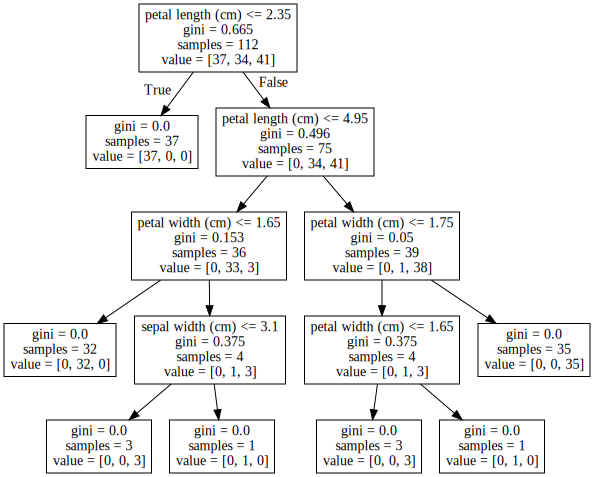

In [8]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG
graph = Source(export_graphviz(dct_clf, out_file=None, feature_names=iris.feature_names))
SVG(graph.pipe(format='svg'))

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較